In [2]:
import pandas as pd

In [3]:
weather = pd.read_csv('local_weather.csv.', index_col='DATE')

In [4]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [5]:
# according to the dataset, these are the most important columns
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy() # creates a new df with just these columns
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [6]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


## Data Cleansing

In [7]:
core_weather.apply(pd.isnull).sum()/weather.shape[0] # displays percentage of null values for each column

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [8]:
core_weather['snow'].value_counts() # data is from Oakland, CA so this shows it only snowed one day
# column can be deleted because one data point is not enough for ML model

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [9]:
del core_weather['snow']

In [10]:
core_weather['snow_depth'].value_counts() # since no snow, there was no snow depth. Can also delete

snow_depth
0.0    11504
Name: count, dtype: int64

In [11]:
del core_weather['snow_depth']

In [12]:
core_weather[pd.isnull(core_weather['precip'])] # indexes precip rows for only ones with null values

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [13]:
core_weather['precip'].value_counts() # shows that most days, there was no precipitation

precip
0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: count, Length: 176, dtype: int64

In [14]:
core_weather['precip'] = core_weather['precip'].fillna(0) # replace the nulls with 0 rainfall

In [15]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [16]:
core_weather = core_weather.fillna(method='ffill') # this fills value with value from previous row "forward fill"

In [17]:
core_weather.apply(pd.isnull).sum()/weather.shape[0] # displays percentage of null values for each column

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [18]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [20]:
core_weather.index = pd.to_datetime(core_weather.index) # converts index to datetime index

In [21]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [22]:
core_weather.index.year # can do subsets such as just looking at year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=16859)

In [23]:
core_weather.apply(lambda x: (x==9999).sum()) # anywhere there is a 9999 is a missing value. This checks for any of those

precip      0
temp_max    0
temp_min    0
dtype: int64

## Data Exploration

<Axes: xlabel='DATE'>

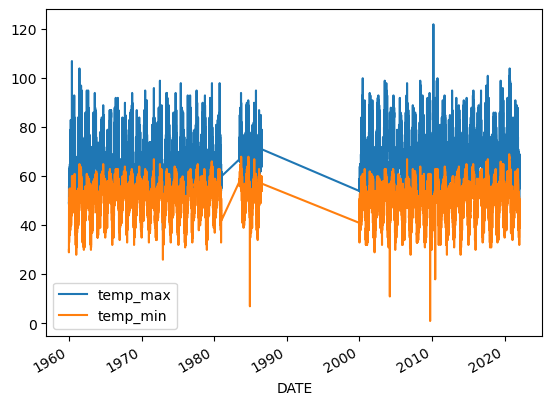

In [24]:
core_weather[['temp_max', 'temp_min']].plot()

In [25]:
core_weather.index.year.value_counts().sort_index() # This will show missing years; .sort_index() puts them in numerical order

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: count, dtype: int64

<Axes: xlabel='DATE'>

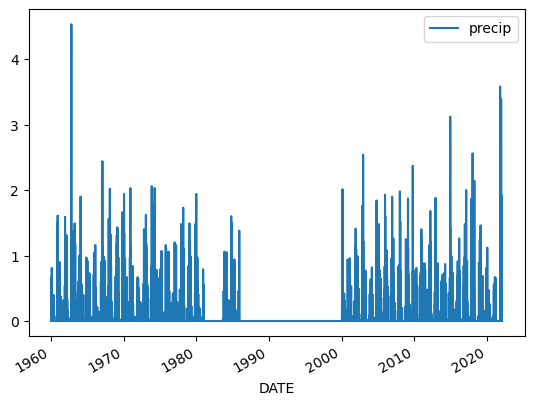

In [26]:
core_weather[['precip']].plot()

In [27]:
core_weather.groupby(core_weather.index.year).sum()['precip'] # shows total amount of rain for each year

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

## Maching Learning Model
### Try to predict tomorrow's max temp

In [28]:
core_weather['target'] = core_weather.shift(-1)['temp_max'] # shift -1 will pull every row back one position
# this will create a column with tomorrow's temperature

In [29]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [30]:
core_weather = core_weather.iloc[:-1,:].copy() # removes last row since it has a missing value

In [31]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

reg = Ridge(alpha = .1)

In [33]:
predictors = ['precip', 'temp_max', 'temp_min'] # list of predictors to predict tomorrows max temp

In [34]:
train = core_weather.loc[:'2020-12-31']

In [35]:
test = core_weather.loc['2021-01-01':]
# splitting this way because we want to use historical data to predict future
# want all the training data to be old data and test data to be more recent

In [36]:
reg.fit(train[predictors], train['target']) # fit model to data: fit to predictors and try to predict target

Ridge(alpha=0.1)

In [37]:
predictions = reg.predict(test[predictors])

In [38]:
from sklearn.metrics import mean_absolute_error # used to see accuracy of model

In [39]:
mean_absolute_error(test['target'], predictions) # will output number of degrees off (on average) from actual max temp

3.411169943452831

In [40]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'prediction']
# combines target column and prediction column for side by side view

In [41]:
combined

,actual,prediction
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

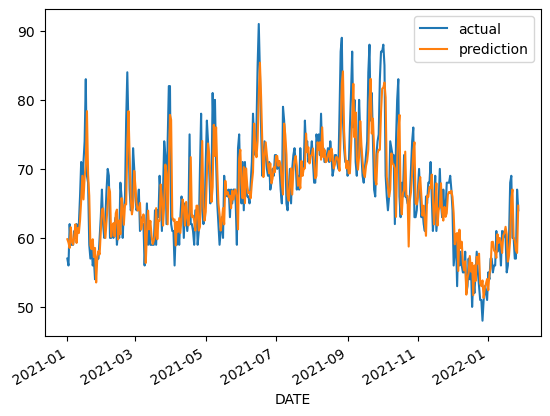

In [42]:
combined.plot()

In [43]:
reg.coef_ # shows how each predictor has an effect on the model

array([-2.20730384,  0.72113834,  0.17969047])

## Create a function to wrap up everything done

In [44]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'prediction']
    return error, combined


##### Create new predictors such as average temp in a month

In [45]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean() # creates a rolling mean for 30 days

In [46]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [47]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max'] # shows how diff monthly avg temp is different than the given day
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min']

In [48]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [49]:
core_weather = core_weather.iloc[30:,:].copy() # removes first 30 rows b/c they have null values

In [50]:
error, combined = create_predictions(predictors, core_weather, reg) # run function with new predictors

In [51]:
error # reduced error slightly

3.360129746207606

<Axes: xlabel='DATE'>

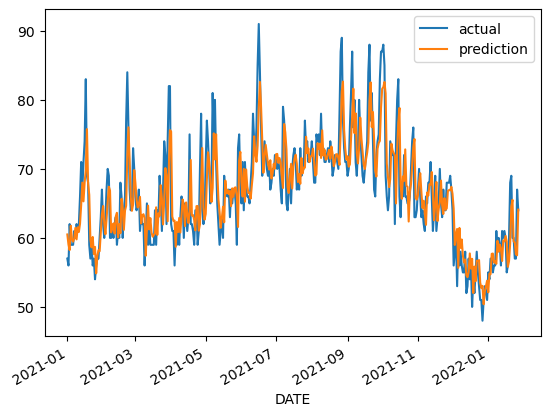

In [52]:
combined.plot()

##### Add in more predictors: monthly average historically

In [56]:
# core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
# groups months and creates mean based only on previous data
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [ ]:
core_weather['day_of_year_avg'] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [57]:
reg.coef_

array([ -1.42071761,   0.38801898,   0.08885225,   0.49028138,
       -18.34609624,   0.10128198])

In [58]:
core_weather.corr()['target']

precip          -0.205413
temp_max         0.821650
temp_min         0.596016
target           1.000000
month_max        0.686842
month_day_max   -0.421537
max_min          0.045228
Name: target, dtype: float64